# "What's Cooking?" Challenge

### By Pratham Sankhala and Preyansh Yadav

## Executive Summary

The objective of this project was to predict cuisines based on a list of ingredients using machine learning techniques. First, we loaded the dataset and performed Exploratory Data Analysis (EDA) to uncover key patterns and ingredient distributions across different cuisines, providing valuable insights for model development. Next, the data was cleaned and preprocessed, with text features being processed using methods like CountVectorizer and TF-IDF. Following this, we implemented three machine learning models—Logistic Regression, Random Forest Classifier, and Support Vector Classifier (SVC)—and performed hyperparameter tuning to optimize their performance. Among these models, the Support Vector Classifier (SVC) achieved the best performance, with a validation accuracy of **80.04%**.

To further optimize the results, hyperparameter tuning was performed using GridSearchCV. The tuned SVC model yielded a validation accuracy of **81%** compared to the initial configuration. As a result, the tuned SVC model was selected as the final model. This approach not only ensured optimal accuracy but also highlighted the effectiveness of the Support Vector Classifier in solving this classification challenge. We got a score of **0.80410** (80.41%) on the Kaggle leaderboard.

 ### Importing Libraries

This section of the notebook includes all the necessary imports to support our data analysis and modeling tasks.


In [13]:
# Standard Library Imports
import os
import zipfile

# Data Handling
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Machine Learning: Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Checking File Availability

This section of the code ensures that the required data files for our analysis are available in the expected directory. We define the file names for our training and testing datasets (`train.json.zip` and `test.json.zip`) and use the `os.path.exists` function to verify their presence:

- **File Names**: The names of the training and testing files are stored in `train_file` and `test_file` variables respectively.
- **Existence Check**: We employ `os.path.exists` to check whether these files exist at the specified location. This function returns `True` if the file is found, and `False` otherwise.
- **Error Handling**: If either file is missing, the code outputs an error message indicating that the necessary file is not found and terminates the execution with `exit()`. This preemptive check helps in avoiding runtime errors during the data loading phase, ensuring that all subsequent operations are performed on the available and correct data.

In [14]:
train_file = "train.json.zip"
test_file = "test.json.zip"

# Check if files exist
if not os.path.exists(train_file) or not os.path.exists(test_file):
    print("Error: train.json.zip or test.json.zip file not found.")
    exit()

### Extracting Data from ZIP Archives

The function `extract_json_from_zip` is designed to retrieve a specific JSON file from a provided ZIP file path. Here’s how it works:

The function takes two arguments: `zip_file_path` and `json_file_name`. `zip_file_path` is the path to the ZIP file, and `json_file_name` is the name of the JSON file within the ZIP archive. The function returns the extracted JSON data as a string. If the JSON file is not found, it returns `None`. If there's an error during the extraction process, it prints an error message and returns `None`.


In [15]:
# Adding a function to extract the correct file from a ZIP archive
def extract_json_from_zip(zip_path, target_filename):
    with zipfile.ZipFile(zip_path, 'r') as z:
        # List all files in the ZIP archive
        file_list = z.namelist()
        print(f"Files in {zip_path}: {file_list}")
        
        # Find and extract the target file
        for file in file_list:
            if file.endswith(target_filename): 
                with z.open(file) as f:
                    return pd.read_json(f)
    raise FileNotFoundError(f"{target_filename} not found in {zip_path}")

### Loading Training Data

This code snippet is responsible for extracting the `train.json` file from a zipped archive specified by `train_file` and loading it into a DataFrame. The function `extract_json_from_zip` handles the extraction and parsing of the JSON file. Once loaded, the initial rows of the DataFrame are displayed using `head()` to verify successful loading and provide a quick preview of the data structure.


In [16]:
# Extract and load train.json
train_df = extract_json_from_zip(train_file, 'train.json')
print("Train Data Loaded Successfully.")
train_df.head()

Files in train.json.zip: ['train.json', '__MACOSX/', '__MACOSX/._train.json']
Train Data Loaded Successfully.


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


### Loading Testing Data

This code snippet is responsible for extracting the `test.json` file from a zipped archive specified by `test_file` and loading it into a DataFrame. The function `extract_json_from_zip` handles the extraction and parsing of the JSON file. Once loaded, the initial rows of the DataFrame are displayed using `head()` to verify successful loading and provide a quick preview of the data structure.


In [17]:
# Extract and load test.json
test_df = extract_json_from_zip(test_file, 'test.json')
print("Test Data Loaded Successfully.")
test_df.head()


Files in test.json.zip: ['test.json', '__MACOSX/', '__MACOSX/._test.json']
Test Data Loaded Successfully.


,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


## Exploratory Data Analysis (EDA)

### 1. Checking Null Values

This code calculates the percentage of missing values for each column in the dataset by dividing the count of null values (`isnull().sum()`) by the total rows and multiplying them by 100.


In [18]:
# print percentage of null values in train data
print("Percentage of null values in train data:")
print((train_df.isnull().sum() / len(train_df)) * 100)

Percentage of null values in train data:
id             0.0
cuisine        0.0
ingredients    0.0
dtype: float64


### 2. Checking Unique Values in Cuisine
In this code, we display all distinct cuisine types in the dataset using NumPy's `unique()` function.

In [19]:
# print unique values in the train data set
print("Unique values in train data:")
print(train_df['cuisine'].unique())

Unique values in train data:
['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


### 3. Checking Unique Values in Ingredients
In this code, we display all distinct cuisine types in the dataset using NumPy's `unique()` function.

In [20]:
# print unique values of ingredients in the train data set
print("Unique values in train data:")
unique_ingredients = set(ingredient for sublist in train_df['ingredients'] for ingredient in sublist)
print(len(unique_ingredients))

Unique values in train data:
6714


### 4. Distribution of Cuisines Visualization
In this code, we create a bar plot to visualize the distribution of different cuisines in our training dataset. This visualization includes count labels on each bar, rotated x-axis labels for better fit, a clean design with removed spines, and subtle gridlines. The plot helps us understand the class distribution and identify any potential imbalances in our dataset.

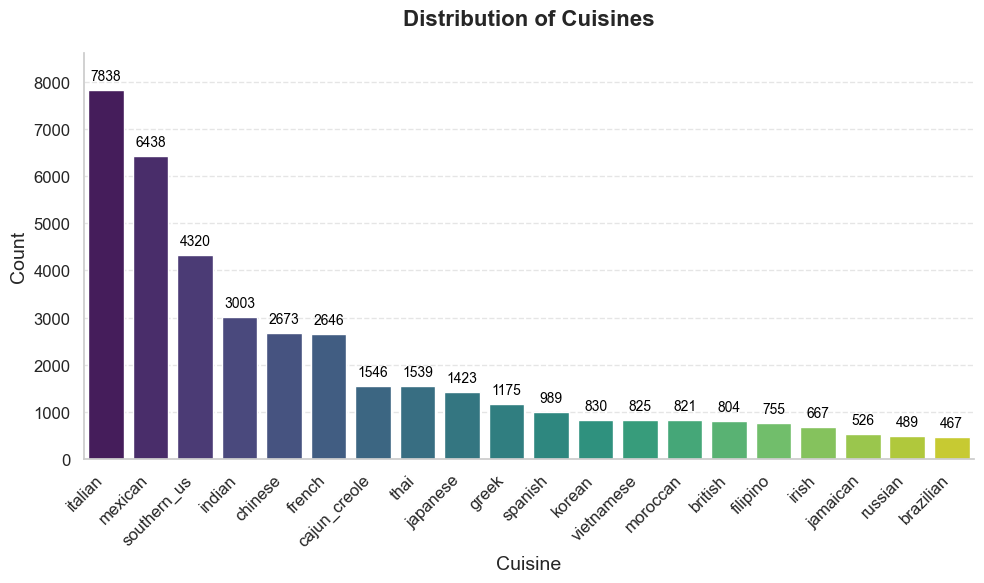

In [21]:
# Set Seaborn style
sns.set(style="whitegrid")

# Get the count of each cuisine
cuisine_counts = train_df['cuisine'].value_counts().reset_index()
cuisine_counts.columns = ['Cuisine', 'Count']

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Cuisine', 
    y='Count', 
    data=cuisine_counts, 
    palette="viridis", 
    hue='Cuisine',  # Assign hue to avoid the deprecation warning
    legend=False    # Disable the legend since it's not needed
)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
        textcoords='offset points'
    )

# Customize the plot
plt.title('Distribution of Cuisines', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)

# Add padding and grid for a cleaner look
plt.ylim(0, max(cuisine_counts['Count']) * 1.1)  # Add padding to the top
plt.grid(axis='y', linestyle='--', alpha=0.5)    # Add a subtle grid

# Remove unnecessary spines for a cleaner look
sns.despine(top=True, right=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The graph reflects the dominance of Italian and Mexican cuisines with substantially greater counts compared to others followed by Southern US, Indian, and Chinese. A significant skew is seen, since a lot of cuisines like Russian, Jamaican, and Brazilian are substantially underrepresented. It hints that the dataset may tend towards overprediction on the frequently represented cuisines but performs weakly on the infrequent ones.

### 5. Plotting the top 20 most common ingredients
In this code, we create a bar plot to visualize the distribution of the top 20 most common ingredients in our dataset. The visualization helps identify which ingredients appear most frequently across all recipes.

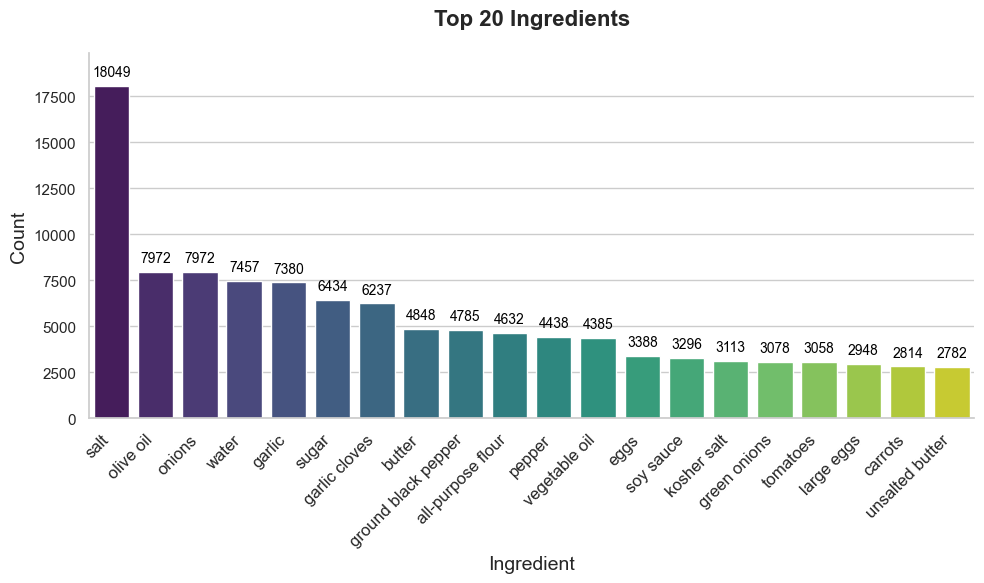

In [22]:
# Flatten the list of ingredients and count their occurrences
all_ingredients = [ingredient for sublist in train_df['ingredients'] for ingredient in sublist]
ingredient_counts = pd.Series(all_ingredients).value_counts().head(20)

# Plot with viridis palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=ingredient_counts.index, 
    y=ingredient_counts.values, 
    palette="viridis"
)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Customize the plot
plt.title('Top 20 Ingredients', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ingredient', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0, max(ingredient_counts.values) * 1.1)  # Add padding to the top
sns.despine(top=True, right=True)  # Clean look

plt.tight_layout()
plt.show()


The graph points out the top 20 ingredients used across cuisines. Salt tops this list with a whopping 18,049 occurrences, a reflection of its universal role in cooking. Ingredients like olive oil, onions, water, and garlic also feature highly, reflecting their versatility and foundational importance in many cuisines. But for ingredients such as butter, flour, and pepper, the data shows extensive usage; for soy sauce and vegetable oil, it reflects influence in particular regional cuisines. Generally speaking, this graph reflects both widespread globally available ingredients and suggests regional bias within the culinary data.

### 6. Ingredient Distribution Visualization
This code creates horizontal bar plots showing the top 5 most common ingredients for each cuisine type in our dataset. The visualization helps us understand ingredient patterns across different cuisines.

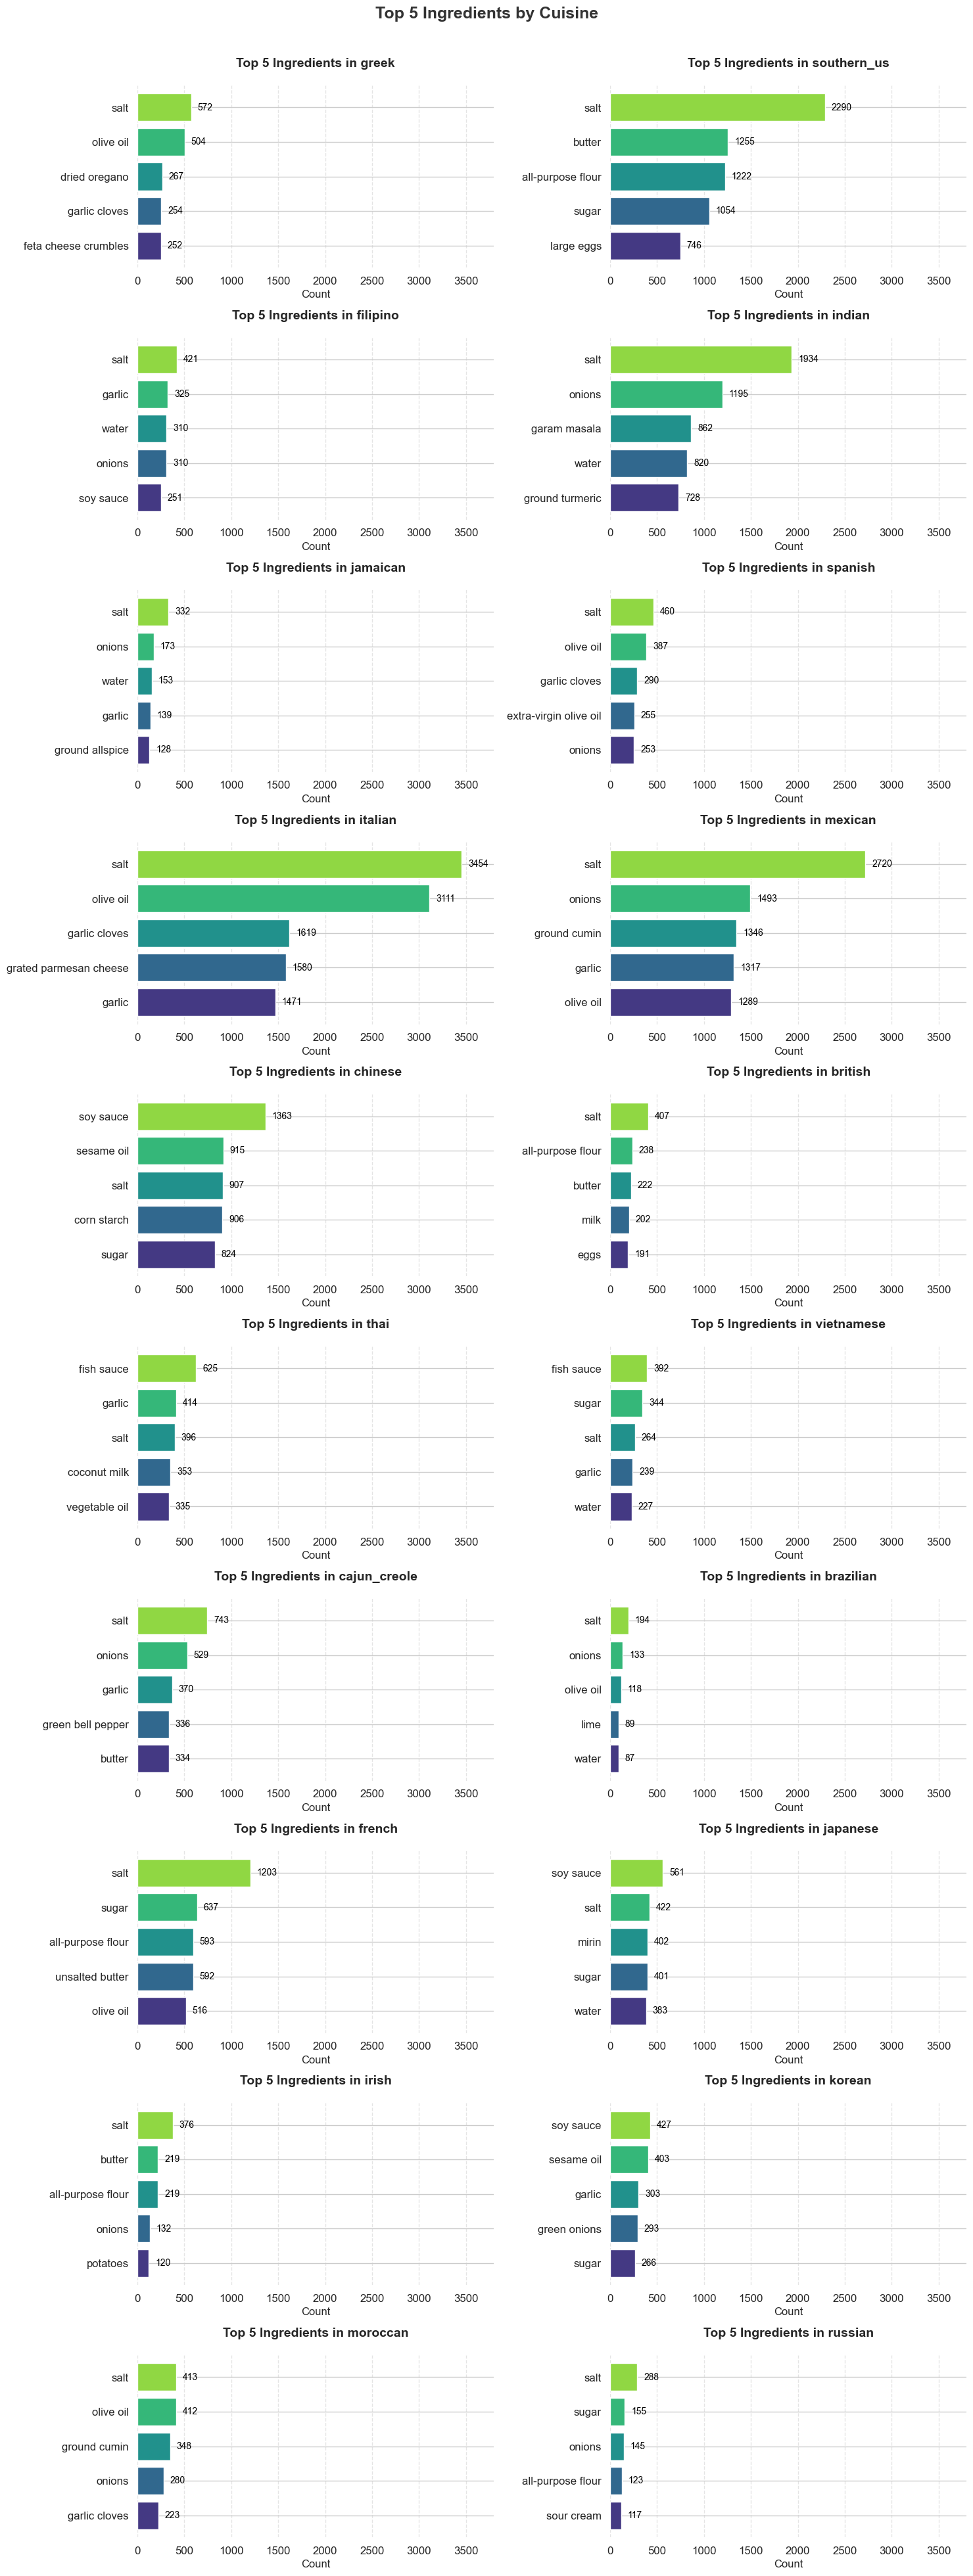

In [23]:
# Set Seaborn style
sns.set(style="whitegrid", font_scale=1.1)

# Explode the ingredients list to count them properly
ingredients_by_cuisine = train_df.explode('ingredients').groupby(['cuisine', 'ingredients']).size().reset_index(name='count')

# Get unique cuisines
cuisines = train_df['cuisine'].unique()
num_cuisines = len(cuisines)

# Creating subplots
fig, axes = plt.subplots(nrows=(num_cuisines + 1) // 2, ncols=2, figsize=(15, 4 * ((num_cuisines + 1) // 2)))
axes = axes.flatten()

# Find the maximum count for consistent y-axis across all plots
max_count = ingredients_by_cuisine.groupby('cuisine').apply(
    lambda x: x.nlargest(5, 'count')['count'].max()
).max()

# Define a Seaborn color palette
colors = sns.color_palette("viridis", n_colors=5)

# Plot for each cuisine
for i, cuisine in enumerate(cuisines):
    # Get top 10 ingredients for this cuisine
    top_ingredients = ingredients_by_cuisine[ingredients_by_cuisine['cuisine'] == cuisine]\
        .nlargest(5, 'count').sort_values('count', ascending=True)
    
    # Creating horizontal bar plot
    bars = axes[i].barh(top_ingredients['ingredients'], top_ingredients['count'], color=colors)
    axes[i].set_title(f"Top 5 Ingredients in {cuisine}", fontsize=14, fontweight='bold', pad=20)
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].set_xlim(0, max_count * 1.1)  # Add 10% padding to the x-axis
    
    # Add value labels on bars with better positioning
    for bar in bars:
        width = bar.get_width()
        axes[i].text(width + (max_count * 0.02),  # Adjust for consistent padding
                     bar.get_y() + bar.get_height() / 2,
                     f'{int(width)}',
                     ha='left', va='center', fontsize=10, color='black')
    
    # Remove unnecessary spines for cleaner look
    sns.despine(left=True, bottom=True, right=True, ax=axes[i])
    axes[i].grid(axis='x', linestyle='--', alpha=0.5)  # Add subtle horizontal gridlines
    
# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Add padding at the top for titles
fig.suptitle('Top 5 Ingredients by Cuisine', fontsize=18, fontweight='bold', color='#333333')

# Show the plot
plt.show()


The graphs reveal the patterns of top five ingredients across these cuisines, and indeed for different cuisines, salt featured as a universal ingredient almost in all cuisines; probably because of its use and importance in flavoring most dishes. Mediterranean cuisine cuisines, such as Italian and Greek, were dominated mainly by olive oil and garlic, whereas soy sauce and sesame oil featured predominantly in all East Asian cuisines such as Chinese, Japanese, and Korean. Southern US and French cuisines highlight a tendency to favor butter, sugar, and flour, which may suggest that baked or rich dishes were more important. Regional specialties such as fish sauce in Thai and Vietnamese cuisines and coconut milk in Thai cuisine illustrate the specific flavor profiles unique to particular traditions. This division reveals that there are common ingredients throughout the world but also very distinct culinary identities created through regional input.

## Data Preprocessing

### 1. Preprocessing the Ingredient data
This code defines a function `preprocess_ingredients` that converts a list of ingredients into a single lowercase string. It then applies this function to the 'ingredients' columns in both training and testing datasets to create new 'ingredients_text' columns.


In [24]:
# Minimal text preprocessing
def preprocess_ingredients(ingredients_list):
    """Join and clean the list of ingredients."""
    return ' '.join(ingredients_list).lower()

train_df['ingredients_text'] = train_df['ingredients'].apply(preprocess_ingredients)
test_df['ingredients_text'] = test_df['ingredients'].apply(preprocess_ingredients)


### 2. Feature Extraction with CountVectorizer
This section utilizes `CountVectorizer` to transform the ingredients text into a matrix of token counts for both training and testing datasets.
 
CountVectorizer is a feature extraction technique in Natural Language Processing (NLP) that converts a collection of text documents into a Bag-of-Words (BoW) representation. It tokenizes the text, builds a vocabulary of unique words, and encodes each document as a vector where each element represents the count of a word in that document. The resulting sparse matrix serves as numerical input for machine learning models, enabling text data to be processed and analyzed.



In [25]:
# Extract features using CountVectorizer
vectorizer = CountVectorizer(lowercase=True, token_pattern=r'\b[a-zA-Z\-]+\b')
X_train_counts = vectorizer.fit_transform(train_df['ingredients_text'])
X_test_counts = vectorizer.transform(test_df['ingredients_text'])

### 3. TF-IDF Transformations
This code section initializes a `TfidfTransformer`, then applies it to the count matrices `X_train_counts` and `X_test_counts` to convert them into TF-IDF features for the training and testing datasets.

TF-IDF is a technique that assigns a weight to words based on their importance in a document relative to a collection of documents, known as the corpus. It increases the score for words that appear frequently in a document, or TF, but reduces it for words that are common across all documents, or IDF. This helps highlight unique and meaningful words while minimizing the impact of common terms.

In [26]:
# Transform the counts into TF-IDF features
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

### 4. Encoding Target Variable
This code encodes the 'cuisine' column in the training dataset using a `LabelEncoder` to transform categorical labels into numerical format, stored in `y_train`.

In [27]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['cuisine'])

### 5. Splitting  the Data using train test split
This code splits the data into training and validation sets using a 20% validation split. The parameter random_state=42 ensures reproducibility by fixing the randomness of the data shuffling and split process.

In [28]:
# Split data into train and validation sets
X_train, X_val, y_train_split, y_val_split = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Modelling Section
We will evaluate three different models: Logistic Regression, Random Forest, and Support Vector Classifier (SVC), to determine which performs best for our dataset.

## Modelling  method 1: Logistic Regression Model
This section initializes a Logistic Regression model with a high iteration limit, trains it on the training data, and evaluates its accuracy and classification performance on the validation set.

---

## Logistic Regression Formula

The probability that the target \( y \) belongs to the positive class \( (y=1) \) is given by:

$$
P(y=1 \mid x) = \frac{1}{1 + e^{-(w \cdot x + b)}}
$$

Where:  
- \( P(y=1 \mid x) \) is the probability of the positive class.  
- \( w \cdot x \) represents the dot product of the weights \( w \) and features \( x \).  
- \( b \) is the bias term.

---

## Decision Rule

To make predictions, a threshold (commonly \( 0.5 \)) is applied:

- If \( P(y=1 \mid x) \geq 0.5 \), predict class **1** (positive).  
- If \( P(y=1 \mid x) < 0.5 \), predict class **0** (negative).


In [29]:
# Initialize models
logistic_model = LogisticRegression(max_iter=1000)

# Train Logistic Regression
print("Training Logistic Regression...")
logistic_model.fit(X_train, y_train_split)
y_pred_logistic = logistic_model.predict(X_val)
logistic_acc = accuracy_score(y_val_split, y_pred_logistic)
print("Logistic Regression Validation Accuracy:", logistic_acc)
print(classification_report(y_val_split, y_pred_logistic, target_names=label_encoder.classes_))



Training Logistic Regression...
Logistic Regression Validation Accuracy: 0.7805153991200503
              precision    recall  f1-score   support

   brazilian       0.75      0.50      0.60        84
     british       0.70      0.37      0.48       157
cajun_creole       0.79      0.66      0.72       328
     chinese       0.76      0.86      0.81       510
    filipino       0.73      0.52      0.61       136
      french       0.60      0.66      0.63       550
       greek       0.79      0.67      0.72       249
      indian       0.87      0.90      0.88       602
       irish       0.63      0.42      0.50       151
     italian       0.79      0.91      0.85      1567
    jamaican       0.90      0.59      0.72        91
    japanese       0.82      0.71      0.76       284
      korean       0.84      0.75      0.79       166
     mexican       0.90      0.93      0.91      1336
    moroccan       0.86      0.73      0.79       166
     russian       0.60      0.40      0.48

## Modlling method 2: Random Forest Model
This snippet initializes a `RandomForestClassifier`, trains it on the training data, predicts the validation set, and prints the accuracy and a detailed classification report.

---

### How It Works

- A **Random Forest** consists of multiple decision trees, each trained on a random subset of the data and features.  
- Predictions are made by **majority voting** for classification tasks or averaging for regression tasks.  

---

### Formula for Final Prediction

For classification, the final prediction is given as:

$$
\hat{y} = \text{argmax}_k \left( \sum_{i=1}^T \mathbb{I}(h_i(x) = k) \right)
$$

Where:  
- \( T \) is the number of decision trees.  
- \( h_i(x) \) is the prediction of the \( i \)-th tree for input \( x \).  
- \( k \) is the class label.  
- \( \mathbb{I} \) is the indicator function, which equals 1 when \( h_i(x) = k \), otherwise 0.

---

### Decision Process

1. Train multiple decision trees using bootstrapped samples of the data.  
2. Use randomness in feature selection at each split.  
3. Aggregate predictions from all trees to produce the final output.  



In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest
print("\nTraining Random Forest...")
rf_model.fit(X_train, y_train_split)
y_pred_rf = rf_model.predict(X_val)
rf_acc = accuracy_score(y_val_split, y_pred_rf)
print("Random Forest Validation Accuracy:", rf_acc)
print(classification_report(y_val_split, y_pred_rf, target_names=label_encoder.classes_))


Training Random Forest...
Random Forest Validation Accuracy: 0.7460716530483973
              precision    recall  f1-score   support

   brazilian       0.83      0.54      0.65        84
     british       0.79      0.27      0.40       157
cajun_creole       0.81      0.61      0.69       328
     chinese       0.70      0.88      0.78       510
    filipino       0.88      0.38      0.53       136
      french       0.59      0.51      0.55       550
       greek       0.80      0.51      0.62       249
      indian       0.83      0.89      0.86       602
       irish       0.72      0.28      0.41       151
     italian       0.70      0.93      0.80      1567
    jamaican       0.92      0.52      0.66        91
    japanese       0.84      0.63      0.72       284
      korean       0.91      0.61      0.73       166
     mexican       0.85      0.93      0.89      1336
    moroccan       0.88      0.58      0.70       166
     russian       0.72      0.26      0.38        89


## Modelling method 3: Support Vector Machine model

Support Vector Classifier (SVC) is a supervised machine learning algorithm that identifies an optimal hyperplane to classify data into different classes. It works well for binary and multi-class classification tasks.

---

### Objective of SVC

The goal of SVC is to maximize the **margin** between the hyperplane and the nearest data points from each class, known as **support vectors**.

---

![alt text](<Support Vector.jpg>)

credits : https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/

 

### Mathematical Formulation

Given a dataset \( D = \{(x_i, y_i)\} \) where \( x_i \in \mathbb{R}^n \) and \( y_i \in \{-1, 1\} \), the decision function is:

$$
f(x) = \text{sign}(w \cdot x + b)
$$

To find the optimal hyperplane, the SVC solves:

$$
\min_{w, b} \, \frac{1}{2} \|w\|^2 \quad \text{subject to} \quad y_i (w \cdot x_i + b) \geq 1, \, \forall i
$$

Where:  
- \( w \) is the weight vector defining the hyperplane.  
- \( x \) represents the input features.  
- \( b \) is the bias term.  
- \( y_i \) is the class label (+1 or -1).  

---

### Kernel Trick

To handle **non-linearly separable data**, SVC uses the **kernel trick** to map data to a higher-dimensional space:

$$
K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
$$

Where \( K \) is the kernel function, such as:  
- **Linear Kernel**: \( K(x_i, x_j) = x_i \cdot x_j \)  
- **RBF Kernel**: \( K(x_i, x_j) = \exp\left(-\gamma \|x_i - x_j\|^2\right) \)

---

### Decision Rule

Once trained, predictions are made as follows:

- If \( f(x) \geq 0 \), predict class **+1**.  
- If \( f(x) < 0 \), predict class **-1**.

In [31]:
# Initialize the SVM model
svm_model = SVC()

# Train SVM
print("\nTraining SVM...")
svm_model.fit(X_train, y_train_split)
y_pred_svm = svm_model.predict(X_val)
svm_acc = accuracy_score(y_val_split, y_pred_svm)
print("SVM Validation Accuracy:", svm_acc)
print(classification_report(y_val_split, y_pred_svm, target_names=label_encoder.classes_))


Training SVM...
SVM Validation Accuracy: 0.8003771213073538
              precision    recall  f1-score   support

   brazilian       0.85      0.55      0.67        84
     british       0.79      0.46      0.58       157
cajun_creole       0.83      0.71      0.77       328
     chinese       0.75      0.89      0.81       510
    filipino       0.79      0.50      0.61       136
      french       0.62      0.69      0.65       550
       greek       0.82      0.70      0.76       249
      indian       0.89      0.91      0.90       602
       irish       0.75      0.47      0.58       151
     italian       0.80      0.92      0.85      1567
    jamaican       0.98      0.67      0.80        91
    japanese       0.88      0.70      0.78       284
      korean       0.89      0.73      0.80       166
     mexican       0.91      0.94      0.92      1336
    moroccan       0.90      0.78      0.83       166
     russian       0.75      0.46      0.57        89
 southern_us       0

## Model Comparison and Selection
This script compares accuracies of Logistic Regression, SVM, and Random Forest models, selects the best one, makes predictions on the test set, and saves the results to a CSV file for submission.

In [32]:
# Compare models and select the best one
model_accuracies = {'Logistic Regression': logistic_acc, 'SVM': svm_acc, 'Random Forest': rf_acc}
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = {'Logistic Regression': logistic_model, 'SVM': svm_model, 'Random Forest': rf_model}[best_model_name]

print("\nModel Comparison:")
for model, acc in model_accuracies.items():
    print(f"{model} Accuracy: {acc:.4f}")

print(f"\nBest Model: {best_model_name} with Accuracy: {model_accuracies[best_model_name]:.4f}")

# Predict on test set using the best model
y_test_pred = best_model.predict(X_test_tfidf)

# Decode predictions
test_predictions = label_encoder.inverse_transform(y_test_pred)

# Save submission file
submission_df = pd.DataFrame({'id': test_df['id'], 'cuisine': test_predictions})
submission_df.to_csv('submission.csv', index=False)
print("\nSubmission file created successfully!")


Model Comparison:
Logistic Regression Accuracy: 0.7805
SVM Accuracy: 0.8004
Random Forest Accuracy: 0.7461

Best Model: SVM with Accuracy: 0.8004

Submission file created successfully!


In the above code chunk, the best performing model is the SVM with an accuracy of 80.04%, followed by Logistic Regression 78.05% and Random Forest 74.61%. A submission file has been successfully created. When we submitted the submission.csv file on kaggle leaderboard we got a score of 0.79646 (79.64%).


# Hyperparameter tuning of SVM Model

This section performs hyperparameter tuning for an SVM classifier using `GridSearchCV` with a specified parameter grid for `C`, `gamma`, and `kernel`. We conduct a grid search over a 3-fold cross-validation to identify the optimal SVM parameters based on accuracy. Results are evaluated through training and validation accuracy comparisons, and a detailed classification report provides insights into the model's performance. The best model is then used to make predictions on the test set, and the results are saved to a CSV file for submission, ensuring a rigorous selection of model parameters for our task.

In [22]:
# Define the SVM hyperparameter grid
param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto'],     
    'kernel': ['linear', 'rbf']  
}

# Initialize the SVM model
svc_model = SVC(probability=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,                        
    verbose=2,
    return_train_score=True,       
    n_jobs=-1                      
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train_split)

# Print the best parameters and best cross-validation score
print("Best Parameters for SVM:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Save GridSearch results for visualization later
grid_results = pd.DataFrame(grid_search.cv_results_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 3.0min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 3.0min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 3.0min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 3.0min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 3.0min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 5.3min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 5.3min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 5.3min
[CV] END ...................C=10, gamma=scale, kernel=linear; total time= 2.6min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 3.0min
[CV] END ...................C=10, gamma=scale, kernel=linear; total time= 2.6min
[CV] END ...................C=10, gamma=scale, k

## Training vs Validation Accuracy Plot for SVM

This section visualizes the impact of different hyperparameter combinations (`C`, `kernel`, `gamma`) on SVM performance. Results are sorted by validation accuracy, and both training and validation accuracies are plotted. The training accuracy is shown as a dashed blue line, and the validation accuracy as a solid orange line.

The best-performing combination, with the highest validation accuracy, is highlighted with a red dot and annotated for clarity. Titles, labels, and rotated x-axis ticks ensure the plot is clear and interpretable. This visualization helps identify the optimal hyperparameter settings for the SVM model efficiently.

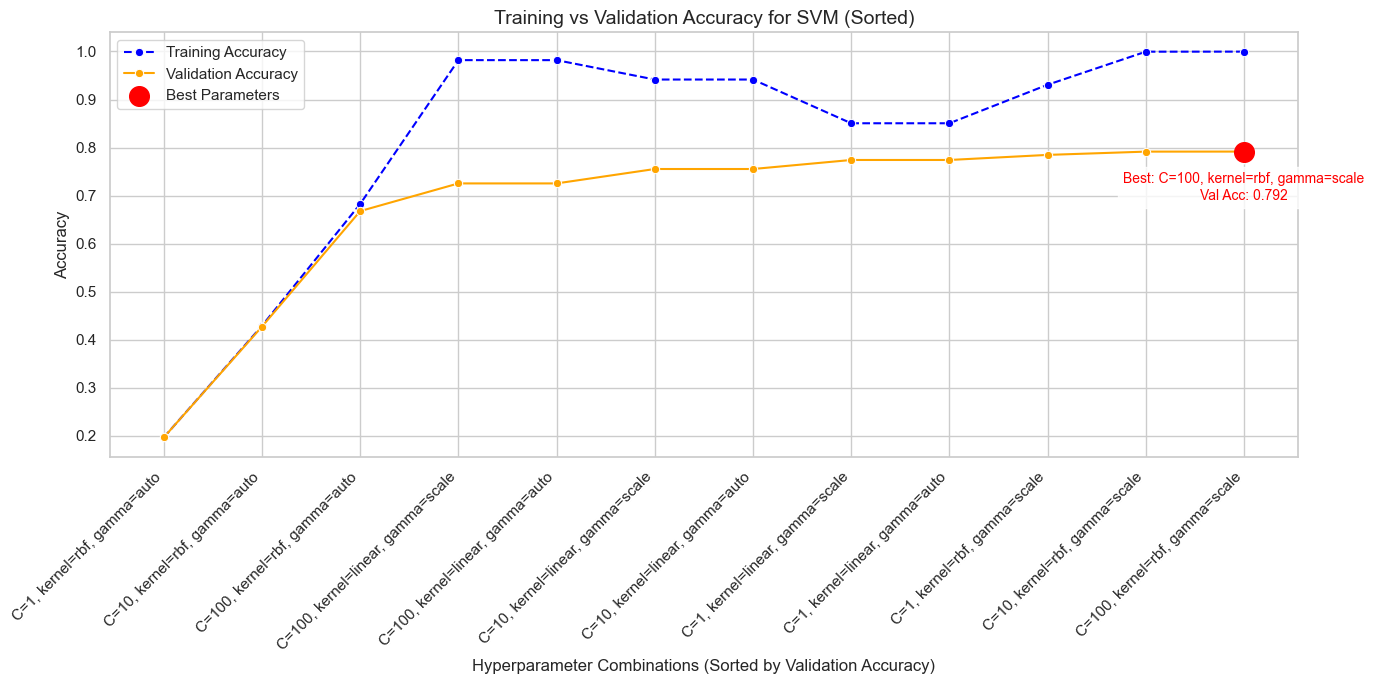

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# Extract train and validation scores and sort by validation accuracy
grid_results_sorted = grid_results.sort_values(by='mean_test_score', ascending=True)
train_scores = grid_results_sorted['mean_train_score']
val_scores = grid_results_sorted['mean_test_score']

# Combine C, kernel, and gamma into a single label for each hyperparameter combination
param_combinations = [f"C={row['param_C']}, kernel={row['param_kernel']}, gamma={row['param_gamma']}" 
                      for _, row in grid_results_sorted.iterrows()]

# Find the best validation accuracy and corresponding index
best_index = val_scores.idxmax()
best_param = param_combinations[-1]  # Best combination is the last after sorting
best_val_score = val_scores.max()
best_train_score = train_scores.iloc[-1]

# Plot using Seaborn
plt.figure(figsize=(14, 7))

# Plot training and validation accuracies
sns.lineplot(x=param_combinations, y=train_scores, label="Training Accuracy", marker='o', linestyle='--', color='blue')
sns.lineplot(x=param_combinations, y=val_scores, label="Validation Accuracy", marker='o', color='orange')

# Highlight the best point with a red dot
plt.scatter(len(param_combinations) - 1, best_val_score, color='red', s=200, label="Best Parameters", zorder=5)

# Add an annotation with an arrow pointing to the red dot
plt.annotate(
    f"Best: {best_param}\nVal Acc: {best_val_score:.3f}",
    xy=(len(param_combinations) - 1, best_val_score),        # Point to the red dot
    xytext=(len(param_combinations) - 1, best_val_score - 0.1),  # Position below the dot
    arrowprops=dict(facecolor='red', arrowstyle="->", lw=1.5),  # Arrow styling
    fontsize=10,
    color="red",
    ha="center",
    bbox=dict(facecolor='white', alpha=0.8)
)

# Customize the plot
plt.xticks(rotation=45, ha="right")
plt.xlabel("Hyperparameter Combinations (Sorted by Validation Accuracy)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Validation Accuracy for SVM (Sorted)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

The graph compares training and validation accuracy across various SVM hyperparameter combinations. Training accuracy (blue) steadily increases, whereas validation accuracy (yellow) plateaus at around 0.79, with a danger of overfitting at higher complexity. The best parameters are identified as C=100, kernel=rbf, gamma=scale, resulting in a validation accuracy of 0.792: the best balance between the performance of the model and generalization.

## Model Evaluation with Best SVM Estimator

The best SVM model retrieved from GridSearchCV is trained on the full training set. The model's performance is evaluated on both the training and validation sets using accuracy scores. Predictions are made for both sets, and the accuracy results are printed.

Additionally, a **classification report** is generated for the validation set, providing detailed metrics like precision, recall, and F1-score for each class. This step ensures a thorough evaluation of the model's performance.

In [23]:
# Retrieve the best estimator from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Train the model on the full training set
best_svm_model.fit(X_train, y_train_split)

# Evaluate on the training set
y_train_pred = best_svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train_split, y_train_pred)

# Evaluate on the validation set
y_val_pred = best_svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val_split, y_val_pred)

# Print Train and Validation Accuracy
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Print Classification Report for Validation Set
print("\nClassification Report on Validation Set:")
print(classification_report(y_val_split, y_val_pred, target_names=label_encoder.classes_))

Training Accuracy: 0.999622866840567
Validation Accuracy: 0.809553739786298

Classification Report on Validation Set:
              precision    recall  f1-score   support

   brazilian       0.84      0.63      0.72        84
     british       0.66      0.54      0.59       157
cajun_creole       0.82      0.73      0.77       328
     chinese       0.77      0.86      0.82       510
    filipino       0.79      0.60      0.68       136
      french       0.64      0.71      0.67       550
       greek       0.80      0.73      0.77       249
      indian       0.89      0.91      0.90       602
       irish       0.66      0.52      0.59       151
     italian       0.82      0.91      0.86      1567
    jamaican       0.93      0.71      0.81        91
    japanese       0.84      0.72      0.77       284
      korean       0.89      0.78      0.83       166
     mexican       0.92      0.93      0.93      1336
    moroccan       0.90      0.80      0.85       166
     russian     

## Classification Report Visualization

This section visualizes the classification report for the validation set, displaying precision, recall, and F1-score for each cuisine. The classification report is first converted into a DataFrame, excluding the overall averages. A bar chart is plotted, where precision, recall, and F1-score are represented by green, blue, and red bars, respectively, with value labels added for clarity. Additionally, a dashed red line indicates the overall accuracy, annotated to highlight the model's average performance. This visualization offers an intuitive and detailed comparison of the model's performance across all cuisines, showcasing its strengths and areas for improvement.

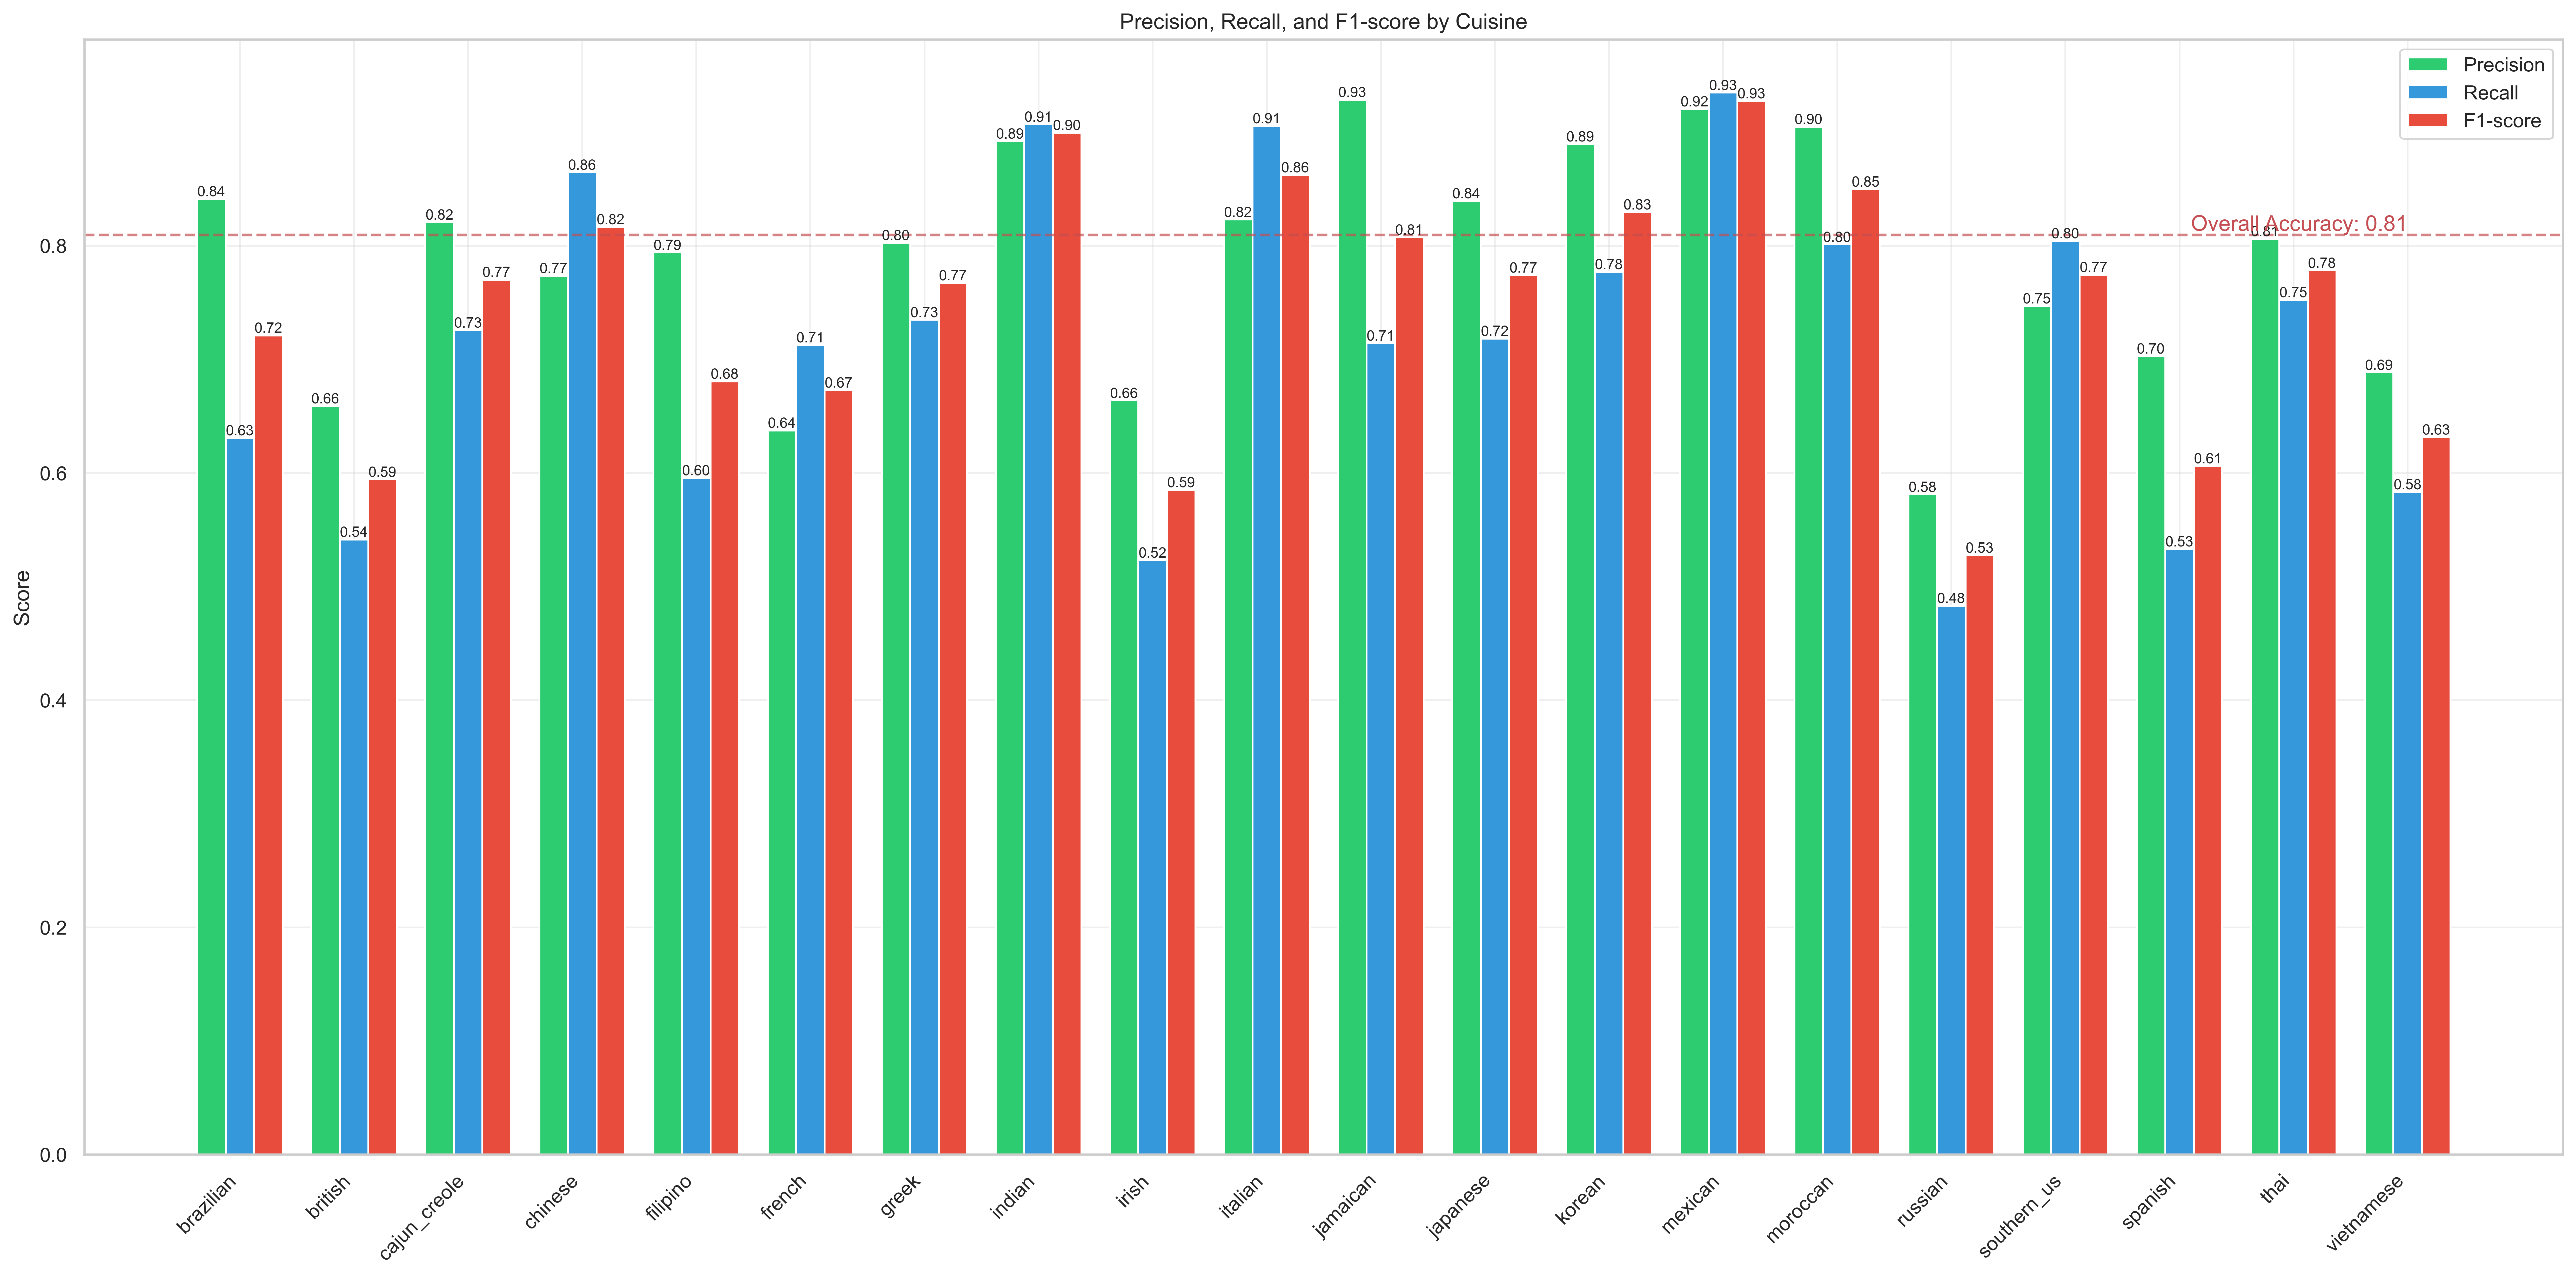

In [ ]:
# Assuming `y_val_split` and `y_val_pred` are already defined
report = classification_report(y_val_split, y_val_pred, target_names=label_encoder.classes_,output_dict=True)

# Convert the classification report into a DataFrame
report_df = pd.DataFrame(report).T

# Remove the overall averages row (support is NaN)
report_df = report_df[:-3]  

# Extract values for plotting
cuisines = report_df.index
precision = report_df['precision']
recall = report_df['recall']
f1_score = report_df['f1-score']
support = report_df['support']

# Plot Precision, Recall, and F1-score
plt.figure(figsize=(20, 10),dpi = 500)
x = np.arange(len(cuisines))
width = 0.25

bars1 = plt.bar(x - width, precision, width, label='Precision', color='#2ecc71')
bars2 = plt.bar(x, recall, width, label='Recall', color='#3498db')
bars3 = plt.bar(x + width, f1_score, width, label='F1-score', color='#e74c3c')

# Add value labels
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=8)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Plot details
plt.xticks(x, cuisines, rotation=45, ha="right")
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score by Cuisine')
plt.legend()
plt.grid(True, alpha=0.3)

# Overall Accuracy (from classification report)
overall_accuracy = report['accuracy']
plt.axhline(y=overall_accuracy, color='r', linestyle='--', alpha=0.7)
plt.text(len(cuisines)-1, overall_accuracy, f'Overall Accuracy: {overall_accuracy:.2f}', 
         ha='right', va='bottom', color='r')

plt.tight_layout()
plt.show()

The graph above shows the Precision, Recall, and F1-score for each cuisine after using Grid Search CV with an overall accuracy of 0.81. For example, Japanese, Korean, and Mexican have the highest scores for all metrics. On the contrary, cuisines such as Cajun/Creole, British, and Russian fared poorly, with low precision, recall, and F1-scores, which suggest that the model cannot really predict well these underrepresented or vague classes. This performance gap thus raises the issue of the potential need for further class balancing or feature optimization in an effort to improve the performance of infrequent cuisines.

## Final Predictions and Submission

Using the best SVM model, predictions are made on the test set. The predicted labels are decoded to their original class names using the label encoder. A submission DataFrame is created with the test IDs and corresponding cuisine predictions. Finally, the predictions are saved to a CSV file named `submission_svm_tuned.csv` for submission.

In [25]:
# Predict on the test set using the best model
y_test_pred = best_svm_model.predict(X_test_tfidf)

# Decode the predictions 
test_predictions = label_encoder.inverse_transform(y_test_pred)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': test_df['id'],     
    'cuisine': test_predictions   
})

# Save the predictions to a CSV file
submission_file = 'submission_svm_tuned.csv'
submission_df.to_csv(submission_file, index=False)

print(f"Predictions saved to {submission_file} successfully!")

Predictions saved to submission_svm_tuned.csv successfully!


## Conclusion

The Support Vector Classifier (SVC) proved to be the best-performing model for predicting cuisines. After hyperparameter tuning, the model achieved an impressive **81% accuracy** on the validation data, with a **Kaggle leaderboard score of 0.8041 (80.41%)**. This result highlights the effectiveness of SVC in handling the dataset and accurately classifying cuisines based on ingredients. The systematic evaluation and tuning process ensured the model was optimized for performance, delivering strong and reliable results.


![alt text](<Kaggle Leaderboard-1.jpeg>)

Here, the submission.csv is the prediction file generated by the SVC Model without hyperparameter tuning and submission_svm_tuned.csv is the prediction file generated by the SVC Model with hyperparameter tuning. The submission_svm_tuned.csv file was submitted on the Kaggle leaderboard and we got a score of 0.80410 (80.41%).